In [62]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels as sm
from scipy import stats
from scipy.stats import sem
from scipy.stats import pearsonr 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels.api as smf
from sklearn.metrics import mean_squared_error

### Examine dataset

In [2]:
df = pd.read_csv('salary.csv')
df

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...
509,45906.0,6,17,11,0.92,1,0,2,0,2,70
510,60402.0,6,19,7,0.86,1,0,3,0,1,72
511,53187.0,19,7,6,0.78,1,0,3,0,4,76
512,56542.0,8,20,10,0.78,1,0,3,0,2,78


In [3]:
#checking the number of rows and columns 
df.shape

(514, 11)

In [4]:
#checking for missing values
df.isnull().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

In [5]:
df['salary'].fillna(df['salary'].mean(),inplace=True)

In [36]:
#splitting data
x = df
y = df.salary

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [38]:
#examining training set
x_train.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
419,34603.0,0,6,4,0.79,1,0,1,0,2,1
135,53543.0,9,4,4,1.17,1,0,2,1,1,1
386,33800.0,0,0,0,0.84,1,0,1,0,3,4
122,49667.0,0,12,4,0.88,1,0,2,1,2,0
22,34731.0,1,1,1,0.85,1,0,1,1,4,3


In [39]:
#checking the number of rows and columns in training set
x_train.shape

(359, 11)

In [40]:
#data appropriate for linear regression
stats.pearsonr(x_train['yearsworked'],x_train['salary'])

(0.6060480089102416, 2.266003579671186e-37)

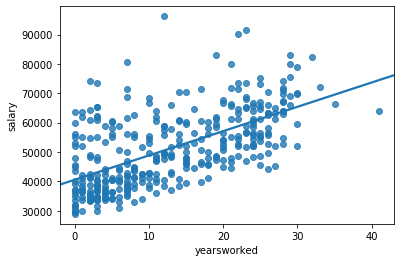

In [50]:
#plotting scatter plot
sns.regplot(x='yearsworked', y='salary', data= x_train, ci= None)

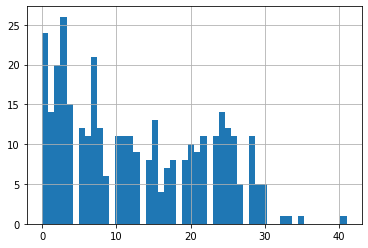

In [60]:
#plotting histogram
x_train['yearsworked'].hist(bins=50)

In [66]:
#creating model
x_train = smf.add_constant(x_train['yearsworked'])
lm = smf.OLS(y_train, x_train).fit()

In [67]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     207.2
Date:                Tue, 11 Feb 2020   Prob (F-statistic):           2.27e-37
Time:                        12:21:02   Log-Likelihood:                -3825.5
No. Observations:                 359   AIC:                             7655.
Df Residuals:                     357   BIC:                             7663.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.058e+04    910.788     44.553      0.000    3.88e+04    4.24e+04
yearsworked   827.1461     57.457     14.396      0.000     714.150     940.143
==============================================================================
Omnibus:                       59.682   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.799
Skew:                           1.064   Prob(JB):                     8.61e-20
Kurtosis:                       4.158   Cond. No.                         26.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""